# Part II - Ford GoBike (San Francisco)
## by Ruth Jepngetich Kibor

## Investigation Overview


> The presentation will showcase information concerning Ford GoBike in the month of February 2019. From the data, the key insights are:
-  A large number of subscribers are male at 119,000.
- From this faceted scatter plot, we can clearly see that the gender 'Other' has a young population of ridrs with a majority between 20 and 60. The outlier with 140 years of age is a female. We can also see that a lot more males ride longer durations compared to the other genders.
- A majority of the riders are male,followed by females and then other.



## Dataset Overview

The dataset obtained from https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems had 183,412 rows and 16 columns before feature engineering and adding some columns such as day and month and dropping some columns and rows. The dataset now has 174,952 rows and 18 columns.The data has columns such as:
- Start date and time - "start_date: start date of trip with date and time"
- Start station location - "start_station: station id of start station"
- End date and time - "end_date: end date of trip with date and time"
- End station location - "end_station_id: station id of end station"
- Bike number - "bike_nr: id of bicycle used"
- Membership type - "subscription_type: (should be cognizant of varying membership types)"
- age of member (of registered user) - "birth_date: birth year of user"
- gender of member (of registered user) - "gender: gender of user"

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Loading dataset using pd.read_csv()
fordbike= pd.read_csv("201902-fordgobike-tripdata.csv")
print(fordbike.shape)
print(fordbike.head())

(183412, 16)
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811 

In [3]:
# Dropping null values in columns with null values
col= ['start_station_id','start_station_name','end_station_id','end_station_name', 'member_birth_year','member_gender']
fordbike.dropna(subset=col, inplace= True)
print(fordbike.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB
None


In [4]:
#https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
fordbike['start_date'] = pd.to_datetime(fordbike['start_time']).dt.date
fordbike['start_time1'] = pd.to_datetime(fordbike['start_time']).dt.time


fordbike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_date                  object
start_time1                 object
dtype: object

In [5]:
fordbike['end_date'] = pd.to_datetime(fordbike['end_time']).dt.date
fordbike['end_time1'] = pd.to_datetime(fordbike['end_time']).dt.time

fordbike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_date                  object
start_time1                 object
end_date                    object
end_time1                   object
dtype: object

In [6]:
# Changing end_date to datetime format
fordbike['end_date']=pd.to_datetime(fordbike['end_date'], format='%Y-%m-%d')

fordbike.end_date.dtypes

dtype('<M8[ns]')

In [7]:
#Getting day of the week and month
fordbike['day']=fordbike['end_date'].dt.day_name()
fordbike['month']= fordbike['end_date'].dt.month_name()

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March


In [8]:
# getting Duration
fordbike['duration_hour'] = fordbike['duration_sec']/3600
fordbike.duration_hour = fordbike.duration_hour.astype('int64')

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0


In [9]:
# getting Duration
fordbike['duration_minute'] = fordbike['duration_sec']/60
fordbike.duration_minute = fordbike.duration_minute.astype('int64')

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour,duration_minute
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14,869
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0,26
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0,29


In [10]:
# Getting Age
fordbike['age'] = 2019 - fordbike['member_birth_year']

fordbike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour,duration_minute,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14,869,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17,1030,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10,608,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0,26,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0,29,60.0


In [11]:
# Changing the age datatype to integer
fordbike.age = fordbike.age.astype('int64')


fordbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_time1                174952 

In [12]:
# Dropping unnecessary columns
col_list=['start_time','end_time','start_station_id','end_station_id','bike_id','duration_sec','member_birth_year']
fordbike.drop(col_list, axis=1, inplace=True)

fordbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_time1                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_time1                  174952 non-null object
day                        174952 non-null object
month                      174952 non-null object
duration_hour              174952 non-null int64
duration_minute            174952 non-null int64
age                        17

## (Visualization 1)


The below visualization is a bar plot depicting the distribution of gender in the data. I wanted to know which gender had the highest number of rides. From the graph, males had the highest number of rides.



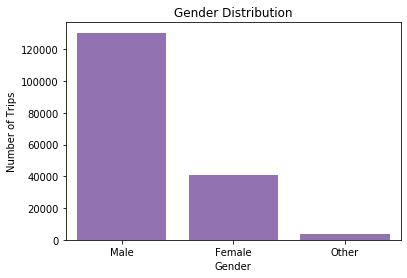

In [13]:
# a function for bar graphs
def bar_graph(col_name, title,x,y):
    base_color= sb.color_palette()[4]
    freq= fordbike[col_name].value_counts().index
    sb.countplot(data= fordbike, x=col_name, color= base_color, order=freq);

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    
# A bar graph of the gender distribution
bar_graph('member_gender',"Gender Distribution","Gender",'Number of Trips')

## (Visualization 2)

> With the heatmap below,  wanted to explore the relationship between the gender of a user and whether they were a subscriber or a customer. From the heatmap, a majority of subscribers are males at 119,000.

Text(0.5, 1, 'Relationship between Gender and User Type')

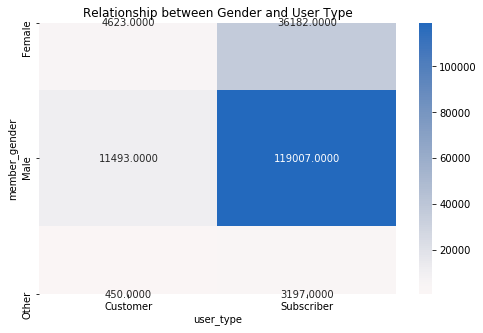

In [14]:
# A heat map of gender and user type
plt.figure(figsize=[8,5])
counts= fordbike.groupby(['member_gender', 'user_type']).size()
counts= counts.reset_index(name= 'count')
counts=counts.pivot(index='member_gender', columns='user_type', values= 'count');
sb.heatmap(counts, annot= True, fmt='.4f', cmap = 'vlag_r', center = 0)

plt.title('Relationship between Gender and User Type')

## (Visualization 3)

I created a faceted plot with three of my areas of interest; gender, duration and age. I used a faceted scatter plot. From this faceted scatter plot, we can clearly see that the gender 'Other' has a young population of ridrs with a majority between 20 and 60. The outlier with 140 years of age is a female. We can also see that a lot more males ride longer durations compared to the other genders.


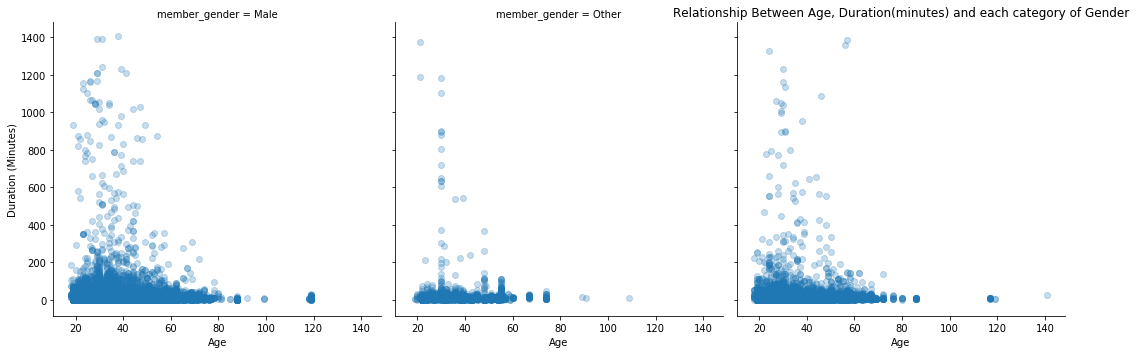

In [16]:
# create faceted scatter plot on levels of gender
g = sb.FacetGrid(data = fordbike, col = 'member_gender', col_wrap = 3, size = 5)
g.map(plt.scatter, 'age', 'duration_minute', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration (Minutes)')

plt.title('Relationship Between Age, Duration(minutes) and each category of Gender')
plt.show()

In [ ]:
!jupyter nbconvert  C:\Users\Ruth Kibor\.ipynb_checkpoints\Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt